In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Importing Dataset

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df['target'], test_size=0.35, random_state = 7)

### Desicion Tree

In [4]:
clf = DecisionTreeClassifier(random_state = 4)

In [5]:
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

acc = accuracy_score(y_test, y_hat)
print(f"Accuracy Score : {acc*100:.2f}%")

Accuracy Score : 92.45%


### Visualization

[Text(111.60000000000001, 199.32, 'X[2] <= 2.45\ngini = 0.666\nsamples = 97\nvalue = [34, 32, 31]'),
 Text(55.800000000000004, 163.07999999999998, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 4.8\ngini = 0.5\nsamples = 63\nvalue = [0, 32, 31]'),
 Text(111.60000000000001, 126.83999999999999, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'X[3] <= 1.7\ngini = 0.114\nsamples = 33\nvalue = [0, 2, 31]'),
 Text(167.4, 90.6, 'X[2] <= 5.0\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(111.60000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(223.20000000000002, 54.359999999999985, 'X[0] <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(279.0, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(279.0, 90.6, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 2

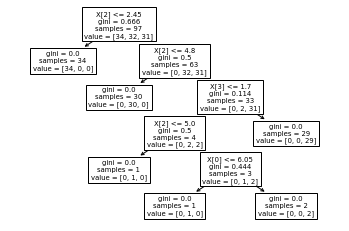

In [6]:
tree.plot_tree(clf)

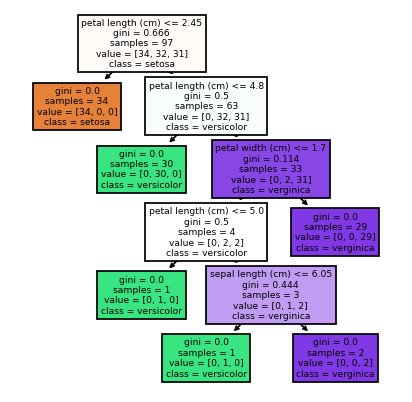

In [7]:
feat = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cls = ['setosa', 'versicolor', 'verginica']
fig, ax = plt.subplots(1, 1, figsize = (4, 4), dpi = 125)

tree.plot_tree(clf, feature_names=feat, class_names=cls, filled = True)
fig.savefig('iris.png')

### Text Representation of Tree

In [8]:
text_repr = tree.export_text(clf)
print(text_repr)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.80
|   |   |--- class: 1
|   |--- feature_2 >  4.80
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_2 <= 5.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  5.00
|   |   |   |   |--- feature_0 <= 6.05
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.05
|   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 2

